In [1]:

# Example notebook to parse and plot Summit CPC data.
# By Heather Guy, 2019-11-20

# Import useful packages.

import matplotlib
#matplotlib.use('Agg')
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
from matplotlib import rcParams
import matplotlib.colors as colors
import os
import glob
from scipy import io


In [2]:
# Function to parse CPC data

# Inputs:
# d_loc: Full path to data directory. File names should include 'CPC' and the date in 'YYYY-MM-DD' format.
# d1:    Start date (python datetime object)
# d2:    End date (python datetime object)

# Output: 
# cpc_counts: pandas dataframe of total aerosol counts in counts/cm3

def get_cpc(d_loc,d1,d2):
    os.chdir(d_loc)
    all_files = glob.glob('*CPC*')
    file_dates = np.asarray([(dt.datetime.strptime(f[-14:-4], '%Y-%m-%d')).date() for f in all_files]) 
    idxs = np.where(np.logical_and(file_dates>=d1.date(), file_dates<=d2.date()))[0]
    dfs = [all_files[i] for i in idxs]
    cpc = pd.DataFrame()
    for f in dfs: 
        # Ignore file if it's empty
        if os.path.getsize(f)==0:
            continue 
        cpc = cpc.append(pd.read_csv(f,sep=',',error_bad_lines=False,header=None,parse_dates={'Dates' : [0,1,2,3,4,5]}))  

    cpc.Dates = pd.to_datetime(cpc.Dates,format='%Y %m %d %H %M %S')
    cpc = cpc.sort_values('Dates')
    cpc = cpc.set_index(cpc['Dates'])
    cpc.index = pd.DatetimeIndex(cpc.index)
    del cpc['Dates']
    cpc_counts =cpc.rename(columns={6:'Concentration (/cm3)'})
    return cpc_counts

In [9]:
# Get the data

d_loc = '/Volumes/Data/ICECAPSarchive/ace/Extracted/CPC/'
d1 = dt.datetime(2019,3,4,0,0)
d2 = dt.datetime(2019,12,30,0,0)

cpc_counts = get_cpc(d_loc,d1,d2)

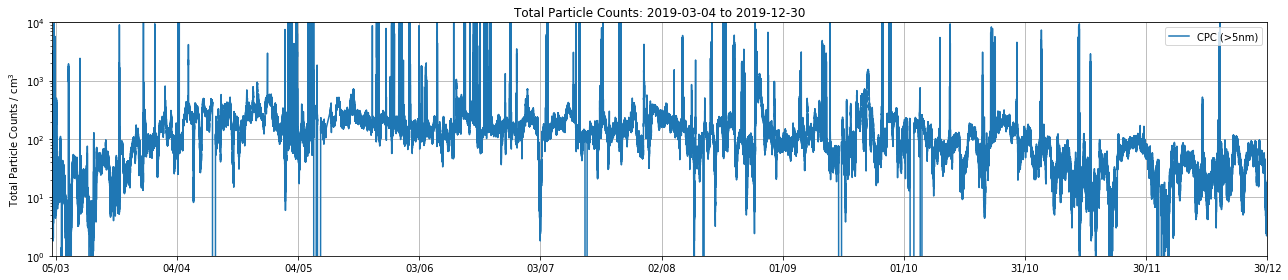

In [10]:
# Plot total counts

fig = plt.figure(figsize=(18,4))
ax = fig.add_subplot(111)
ax.grid(True)
ax.semilogy(cpc_counts.index,cpc_counts['Concentration (/cm3)'], label='CPC (>5nm)')   
ax.set_ylim(1,10000)
ax.set_ylabel('Total Particle Counts / cm$^3$')
ax.set_title('Total Particle Counts: %s'%((dt.datetime.strftime(d1,'%Y-%m-%d')+' to '+dt.datetime.strftime(d2,'%Y-%m-%d'))))
ax.xaxis.set_major_formatter(md.DateFormatter('%d/%m'))
ax.xaxis.set_major_locator(md.DayLocator(interval=30))
ax.set_xlim(d1,d2)
ax.legend(loc='best',fontsize=10)
fig.tight_layout()
#fig.savefig(d_loc + 'Ncounts_current.png')


In [8]:
max(cpc_counts['Concentration (/cm3)'])

414700.0